In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [2]:
!pip install scikit-learn

In [3]:
!pip install streamlit

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
csv_file_path = 'ResaleFlatPrice.csv'

In [7]:
df = pd.read_csv(csv_file_path) 

In [8]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


In [10]:
flatmodel_stats = df.groupby('flat_model').agg({'flat_model': 'count', 'resale_price': ['sum', 'mean']})

# Rename the columns for clarity
flatmodel_stats.columns = ['Count', 'Sum of Resale Price', 'Average Resale Price']

# Calculate Average Rent
flatmodel_stats['Average Resale Price'] = flatmodel_stats['Sum of Resale Price'] / flatmodel_stats['Count']

print("Flat Model Statistics")
print(flatmodel_stats)

Flat Model Statistics
                      Count  Sum of Resale Price  Average Resale Price
flat_model                                                            
2-room                   16         3.068000e+06         191750.000000
Adjoined flat           799         3.080035e+08         385486.209011
Apartment             15274         6.761475e+09         442678.723708
Improved             100441         3.015181e+10         300194.269939
Improved-Maisonette      46         1.851148e+07         402423.478261
Maisonette             9839         4.393501e+09         446539.372867
Model A              106147         2.937001e+10         276691.867625
Model A-Maisonette      626         2.659362e+08         424818.282748
Model A2               6696         1.696493e+09         253359.206838
Multi Generation        160         7.652449e+07         478278.050000
New Generation        71685         1.544653e+10         215477.832701
Premium Apartment     18300         6.484318e+09       

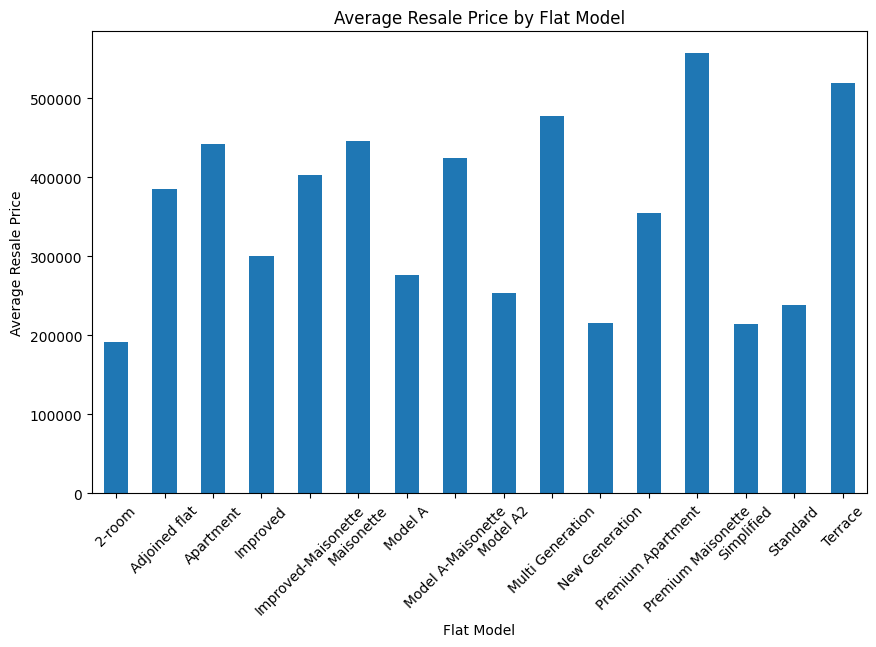

In [11]:
plt.figure(figsize=(10, 6))
flatmodel_stats['Average Resale Price'].plot(kind='bar')
plt.title('Average Resale Price by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.show()

In [12]:
storeyrange_stats = df.groupby('storey_range').agg({'storey_range': 'count', 'resale_price': ['sum', 'mean']})

# Rename the columns for clarity
storeyrange_stats.columns = ['Count', 'Sum of Resale Price', 'Average Resale Price']

# Calculate Average Rent
storeyrange_stats['Average Resale Price'] = storeyrange_stats['Sum of Resale Price'] / storeyrange_stats['Count']

print("Storey Range Statistics")
print(storeyrange_stats)

Storey Range Statistics
              Count  Sum of Resale Price  Average Resale Price
storey_range                                                  
01 TO 03      76806         2.035988e+10         265081.934056
04 TO 06      95136         2.570173e+10         270157.790176
07 TO 09      84673         2.322886e+10         274336.144711
10 TO 12      71215         2.001090e+10         280992.707611
13 TO 15      24521         7.893309e+09         321899.972428
16 TO 18       9018         3.262389e+09         361764.132655
19 TO 21       4209         1.653550e+09         392860.597767
22 TO 24       2521         1.093988e+09         433949.908322
25 TO 27       1032         4.871528e+08         472047.274225
28 TO 30        434         2.234577e+08         514879.400922
31 TO 33         31         2.042967e+07         659021.677419
34 TO 36         20         1.339600e+07         669800.000000
37 TO 39         23         1.568018e+07         681746.782609
40 TO 42         12         7.6

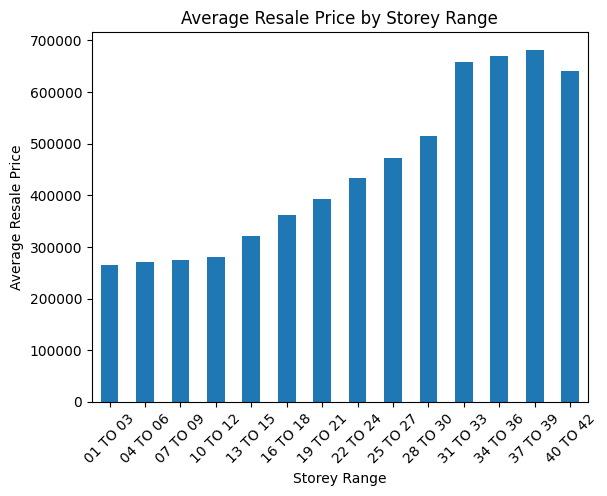

In [13]:
storeyrange_stats['Average Resale Price'].plot(kind='bar')
plt.title('Average Resale Price by Storey Range')
plt.xlabel('Storey Range')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.show()

In [14]:
flattype_stats = df.groupby('flat_type').agg({'flat_type': 'count', 'resale_price': ['sum', 'mean']})

# Rename the columns for clarity
flattype_stats.columns = ['Count', 'Sum of Resale Price', 'Average Resale Price']

# Calculate Average Rent
flattype_stats['Average Resale Price'] = flattype_stats['Sum of Resale Price'] / flattype_stats['Count']

print("Flat Type Statistics")
print(flattype_stats)

Flat Type Statistics
                   Count  Sum of Resale Price  Average Resale Price
flat_type                                                          
1 ROOM               355         2.849170e+07          80258.309859
2 ROOM              3554         4.800592e+08         135075.743669
3 ROOM            114661         2.221052e+10         193705.957555
4 ROOM            142171         3.907855e+10         274870.068231
5 ROOM             81675         3.005106e+10         367934.604211
EXECUTIVE          27075         1.204722e+10         444957.307459
MULTI-GENERATION     160         7.652449e+07         478278.050000


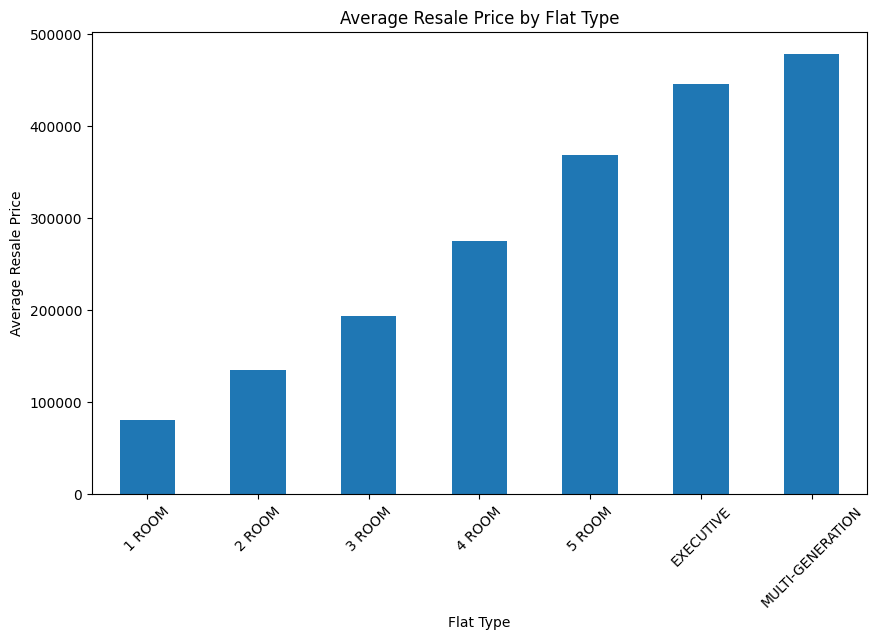

In [15]:
# Increase figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create bar graph
flattype_stats['Average Resale Price'].plot(kind='bar')
plt.title('Average Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.show()

In [16]:
correlation_matrix = df[['lease_commence_date','floor_area_sqm','resale_price']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     lease_commence_date  floor_area_sqm  resale_price
lease_commence_date             1.000000        0.556850      0.437268
floor_area_sqm                  0.556850        1.000000      0.690142
resale_price                    0.437268        0.690142      1.000000


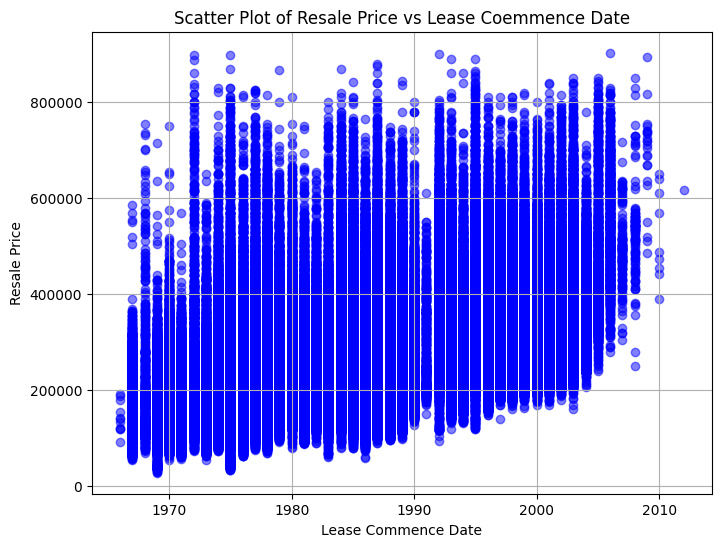

In [17]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['lease_commence_date'], df['resale_price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Resale Price vs Lease Coemmence Date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

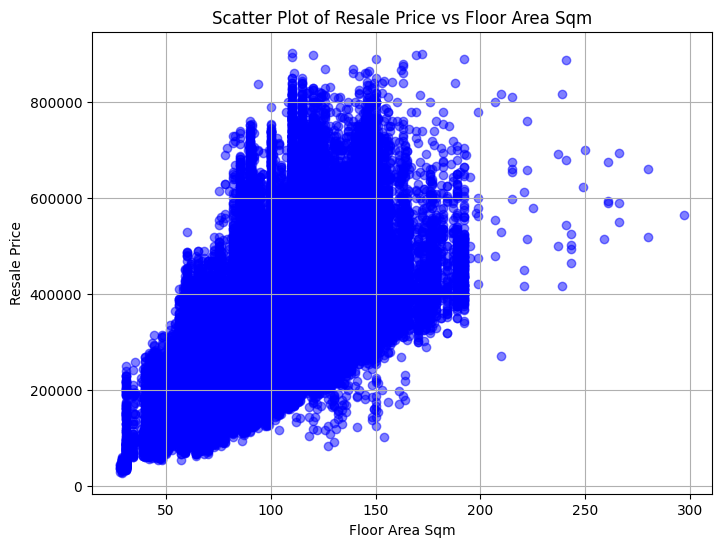

In [18]:
# Create scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(df['floor_area_sqm'], df['resale_price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Resale Price vs Floor Area Sqm')
plt.xlabel('Floor Area Sqm')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

In [19]:
# ML Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
X1 = df[['lease_commence_date','floor_area_sqm']]
y1 = df['resale_price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [22]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [23]:
y_pred = rf_model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5173447400.068499
R-squared: 0.5867788817060093


In [25]:
feature_importances = rf_model.feature_importances_

for feature, importance in zip(X1.columns, feature_importances):
    print(f"{feature}: {importance}")


lease_commence_date: 0.09950237902237961
floor_area_sqm: 0.9004976209776203


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X2 = df[['lease_commence_date','floor_area_sqm']]
y2 = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and train the decision tree regression model
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 5591882589.949203
R-squared: 0.553357017381309


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X3 = df[['lease_commence_date','floor_area_sqm']]
y3 = df['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create and train the Gradient Boosted Regression Trees (GBRT) model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 5232494169.806758
R-squared: 0.5820626121982594


In [28]:
import pickle
import streamlit as st

In [29]:
with open('rf_model', 'wb') as file:
    pickle.dump(rf_model, file)

In [30]:
# Load the pickled Random Forest model
with open('rf_model', 'rb') as file:
    loaded_rf_model = pickle.load(file)

In [31]:
predictions = loaded_rf_model.predict(X_test)  # for any X-Test the predictions can be derived with the random forest clasifier model

In [32]:
predictions

array([266916.18147281, 267564.68940736, 449635.73003272, ...,
       245228.26081386, 354623.16393617, 365386.23664454])